In [243]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from itertools import chain
import seaborn as sb
from collections import Counter

In [3]:
def rep_list(a,b):
    # a = на какое количество частей надо разбить промежуток
    # b = по сколько берем в каждом премедутке
    lists = []
    for i in range(1,a):
        lists.append([i for number in range(b)])
    lis = list(chain(*lists))
    lis.append(10)
    return(lis)

Скачал данные с https://github.com/wesm/pydata-book/tree/2nd-edition/datasets/babynames 

План такой:

1) Получить названия директорий откуда пандас будет считывать файлы,

2) Путем танцев с бубнами, костылями и пандасами создать датафрейм,

3) Вытащить из названий файлов Год анализа,

4) Понять, что это даже не начало задания на визуализацию

In [4]:
yourpath = r'C:\Users\a.dikov\OTUS\5\datasets\babynames'

directory = list()

for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        directory.append(os.path.join(root, name))
        print(os.path.join(root, name))
#1 часть готова

C:\Users\a.dikov\OTUS\5\datasets\babynames\NationalReadMe.pdf
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1880.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1881.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1882.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1883.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1884.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1885.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1886.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1887.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1888.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1889.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1890.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1891.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1892.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1893.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1894.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1895.txt
C:\Users\a.dikov\OTUS\5\datasets\babynames\yob1896.txt
C:\

In [5]:
directory = directory[1:]
directory
#обрезаем для удобства

['C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1880.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1881.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1882.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1883.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1884.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1885.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1886.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1887.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1888.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1889.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1890.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1891.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1892.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1893.txt',
 'C:\\Users\\a.dikov\\OTUS\\5\\datasets\\babynames\\yob1894.txt',
 'C:\\User

In [6]:
dfc = pd.DataFrame(columns=['Name','Sex','Amount','Year'])

for i in directory:
    df = pd.read_csv(i,names=['Name','Sex','Amount'], delimiter=',' )
    df['Year'] = i
    df['Year'] = df['Year'].map(lambda x: x.lstrip(r'C:\Users\a.dikov\OTUS\5\datasets\babynames\yob').rstrip('.txt'))
    dfc = dfc.append(df)

# 2 и 3 часть готовы 

In [7]:
dfc

,Name,Sex,Amount,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


# ЗАДАНИЕ 1: Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

In [8]:
Sex_group = dfc.groupby(['Year', 'Sex']).sum()
Sex_group = Sex_group[['Amount']]
Sex_group

Amount
Year Sex         
1880 F      90993
     M     110493
1881 F      91955
     M     100748
1882 F     107851
     M     113687
1883 F     112322
     M     104632
1884 F     129021
     M     114445
1885 F     133056
     M     107802
1886 F     144538
     M     110785
1887 F     145983
     M     101412
1888 F     178631
     M     120857
1889 F     178369
     M     110590
1890 F     190377
     M     111026
1891 F     185486
     M     101198
1892 F     212350
     M     122038
1893 F     212908
     M     112319
1894 F     222923
     M     115775
...           ...
1996 F    1751681
     M    1892700
1997 F    1739331
     M    1883571
1998 F    1765390
     M    1909676
1999 F    1772139
     M    1918267
2000 F    1813960
     M    1961702
2001 F    1798284
     M    1940498
2002 F    1794358
     M    1938941
2003 F    1824406
     M    1972439
2004 F    1833005
     M    1981557
2005 F    1843890
     M    1993285
2006 F    1896468
     M    2050234
2007 F    1916888
     M    2069242
2008 F    1883645
     M    2032310
2009 F    1827643
     M    1973359
2010 F    1759010
     M    1898382

[262 rows x 1 columns]

In [9]:
dfc

,Name,Sex,Amount,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [10]:
pivot_year = dfc.pivot_table('Amount', index='Year',
                             columns = 'Sex', aggfunc=sum)
pivot_year['delim'] = pivot_year['F'] / pivot_year['M']

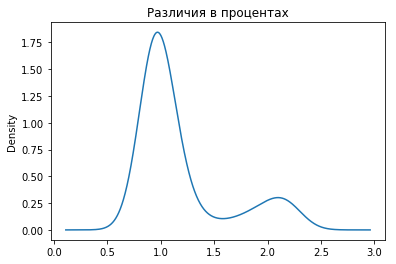

In [11]:
pivot_year['delim'].plot(kind='kde', title = 'Различия в процентах')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028BA9A23240>,
      dtype=object)

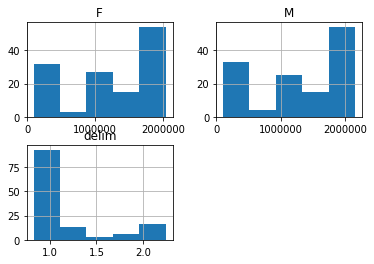

In [12]:
pivot_year.hist(bins=5)

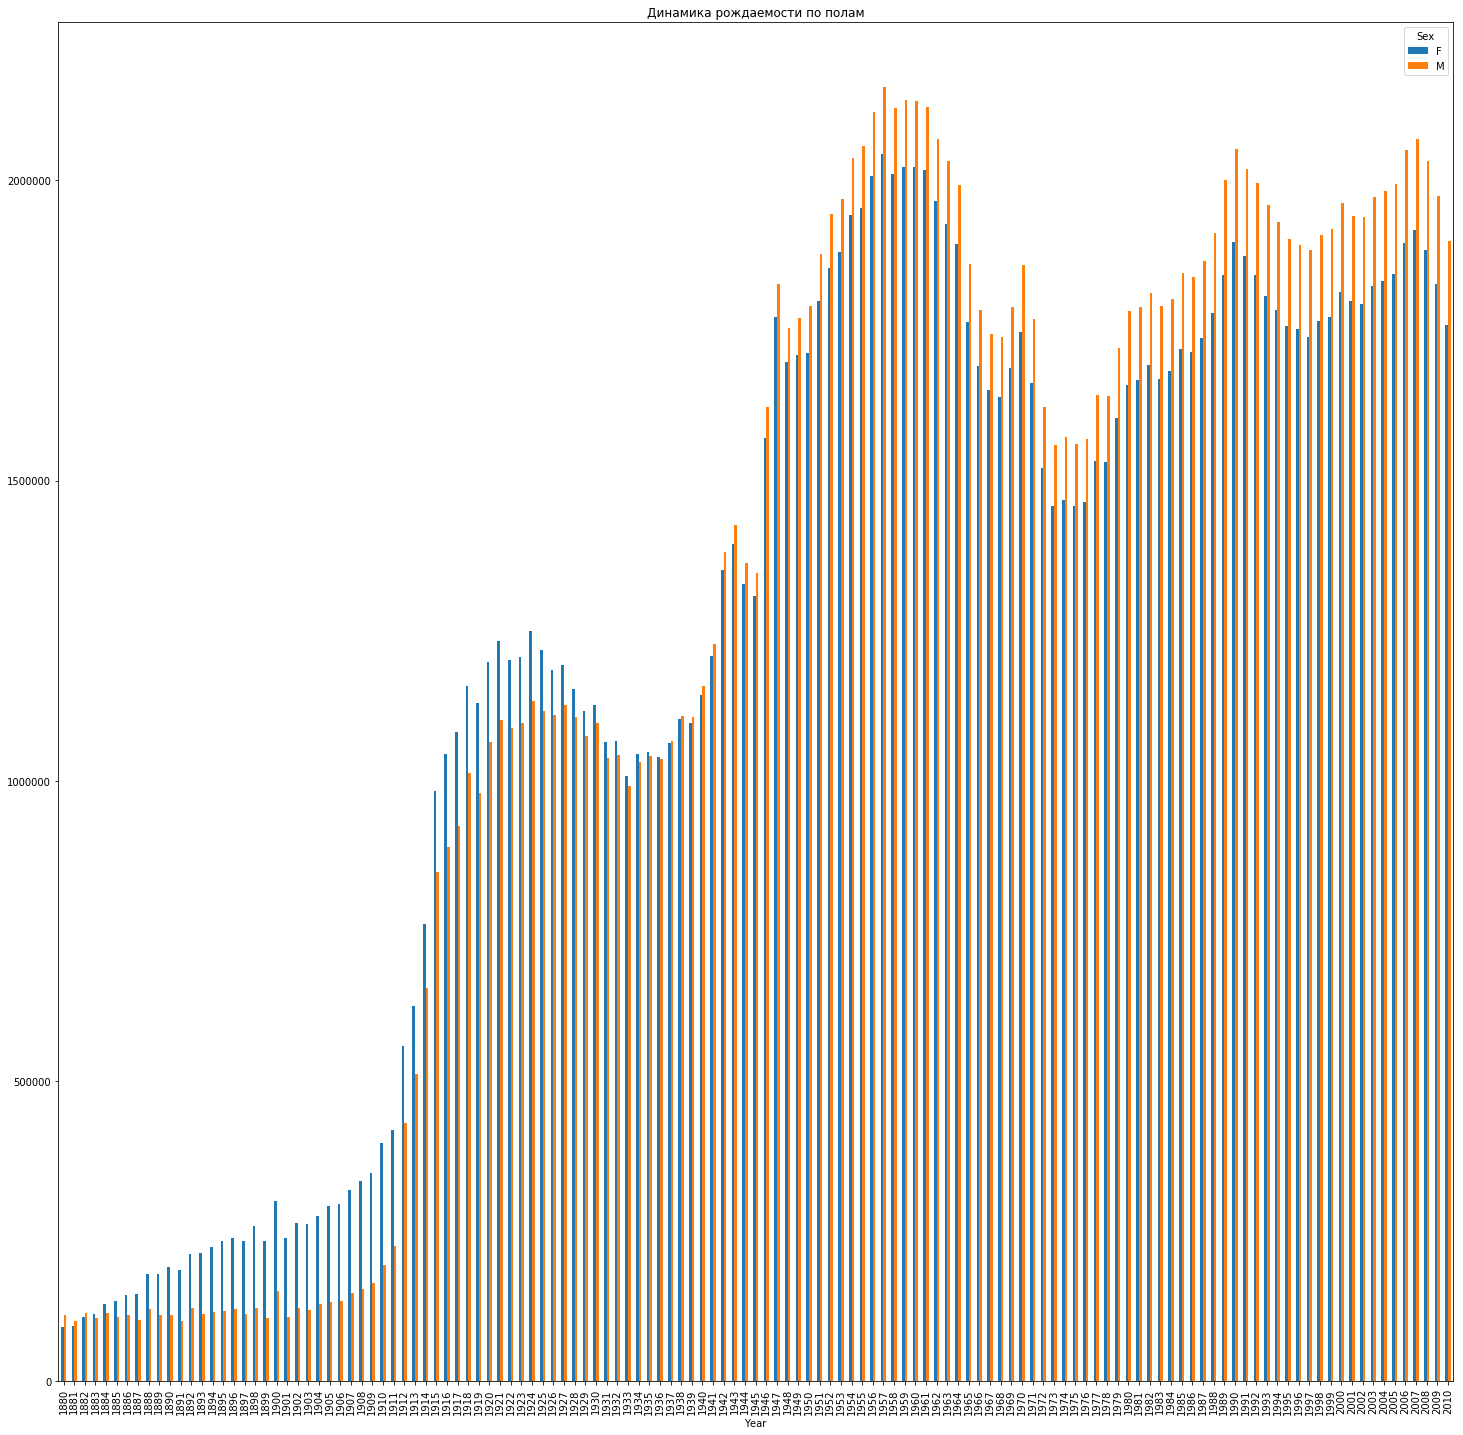

In [13]:
pivot_year[['F','M']].plot(kind = 'bar',figsize = (25,25), title = 'Динамика рождаемости по полам', legend=True, use_index=True)


# Задание №2: Найти самые популярные имена за всю историю.

План такой:

    1) отделяем мужчин от женщин 
    
    2) внутри каждого года делаем рейтинг из топ 3 имен
    
    3) 1 место получает n баллов, 2 место - n - 1 , 3 место - n -2, все остальные имена получают все меньше и меньше по баллам
        
    4) Строим две диаграммы в которой столбцами будут значения сумм баллов по всем именам (и по полам). 
    
 n = кол-во имен
 
 ОБНОВЛЕНИЕ: План провалился после 5 часов попыток
 
 *Новый план*: просто вывести популярные имена по годам😥

In [14]:
pivot_name = dfc.pivot_table('Amount',
                             index='Year',
                             columns = 'Name',
                             aggfunc=sum)
pivot_name.fillna(0)
pivot_name = pivot_name.T
pivot_name_correct = pivot_name.fillna(0)
pivot_name_correct['Sum'] = pivot_name_correct.sum(axis=1)
Main_data = pd.DataFrame(pivot_name_correct['Sum'])
Main_data.sort_values(by = 'Sum',ascending = False,inplace = True)

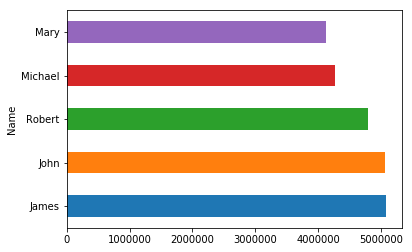

In [15]:
top_5_M = Main_data['Sum'].head()
top_5_M.plot(kind = 'barh')

Ну вроде норм) 🤨

# Задание№3 Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время

In [16]:
year_interval = dfc['Year'].nunique() // 10
years = np.arange(1880, 2010, year_interval )

In [17]:
new_df = dfc.reset_index()
new_df['Year'] = pd.to_numeric(new_df['Year'])

In [18]:
new_df = new_df.loc[0:1690779]

In [19]:
np.unique(new_df['Year']) #Все года есть 

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

In [20]:
date_index = np.repeat(years,169078)

In [21]:
new_df.sort_values(by='Year', ascending=True, inplace = True)

In [22]:
date_index.shape

(1690780,)

In [23]:
new_df.shape

(1690780, 5)

In [24]:
new_df['date_index'] = date_index

In [25]:
new_df.info() ##чуть не плакал на этом моменте

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690780 entries, 0 to 1690779
Data columns (total 6 columns):
index         1690780 non-null int64
Name          1690780 non-null object
Sex           1690780 non-null object
Amount        1690780 non-null object
Year          1690780 non-null int64
date_index    1690780 non-null int32
dtypes: int32(1), int64(2), object(3)
memory usage: 83.8+ MB


In [26]:
girls_df = new_df.where(new_df['Sex'] == 'F')
girls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690780 entries, 0 to 1690779
Data columns (total 6 columns):
index         1003985 non-null float64
Name          1003985 non-null object
Sex           1003985 non-null object
Amount        1003985 non-null object
Year          1003985 non-null float64
date_index    1003985 non-null float64
dtypes: float64(3), object(3)
memory usage: 90.3+ MB


In [27]:
girls_df.dropna(inplace = True)

In [28]:
girls_df.reset_index(inplace=True)

In [29]:
girls_df.drop(['level_0', 'index'], axis=1)

,Name,Sex,Amount,Year,date_index
0,Mary,F,7065,1880.0,1880.0
1,Eda,F,22,1880.0,1880.0
2,Zoe,F,23,1880.0,1880.0
3,Nola,F,23,1880.0,1880.0
4,Missouri,F,23,1880.0,1880.0
5,Lucie,F,23,1880.0,1880.0
6,Lenna,F,23,1880.0,1880.0
7,Juanita,F,23,1880.0,1880.0
8,Idella,F,23,1880.0,1880.0
9,Floy,F,23,1880.0,1880.0


In [30]:
girls_df.info() # Мы получили необходимый датафрейм по девушкам, теперь итс тайм ту груп бай

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003985 entries, 0 to 1003984
Data columns (total 7 columns):
level_0       1003985 non-null int64
index         1003985 non-null float64
Name          1003985 non-null object
Sex           1003985 non-null object
Amount        1003985 non-null object
Year          1003985 non-null float64
date_index    1003985 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 53.6+ MB


In [31]:
girls_max = girls_df.groupby('date_index').aggregate(max)

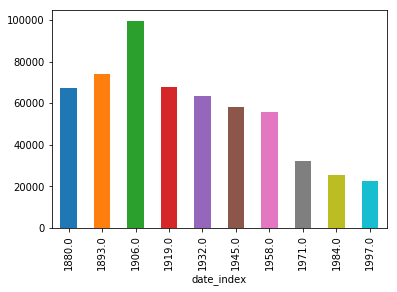

In [35]:
girls_max['Amount'].plot(kind = 'bar')

In [90]:
Ox = dict(girls_max['Amount'])
girls_max_names = set(girls_max['Name'])
x = list(Ox.keys())
y = list(Ox.values())

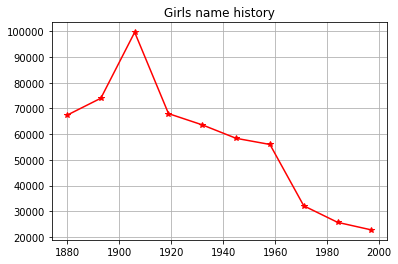

In [81]:
fig = plt.figure()
fig.add_subplot(111)
plt.title('Girls name history')
plt.grid()
plt.plot(x,y,marker = '*',color='r')

In [91]:
girls_max_names #Наш список девушек...думаю у меня где-то ошибка, но я не знаю где

{'Zulma', 'Zuwena', 'Zyanya', 'Zykia', 'Zylphia', 'Zyria', 'Zyriah', 'Zyyanna'}

Мужчины

In [89]:
man_df = new_df.where(new_df['Sex'] == 'M')
man_df.dropna(inplace = True)
man_df.reset_index(inplace=True)
man_df.drop(['level_0', 'index'], axis=1,inplace=True)
man_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686795 entries, 0 to 686794
Data columns (total 5 columns):
Name          686795 non-null object
Sex           686795 non-null object
Amount        686795 non-null object
Year          686795 non-null float64
date_index    686795 non-null float64
dtypes: float64(2), object(3)
memory usage: 26.2+ MB


In [92]:
man_max = man_df.groupby('date_index').aggregate(max)

In [93]:
man_max

,Name,Sex,Amount,Year
date_index,,,,
1880.0,Zygmunt,M,56562,1919.0
1893.0,Zygmunt,M,62108,1936.0
1906.0,Zygmunt,M,94601,1954.0
1919.0,Zyndall,M,92700,1968.0
1932.0,Zvi,M,85298,1979.0
1945.0,Zvi,M,68713,1987.0
1958.0,Zyaire,M,65384,1994.0
1971.0,Zyshonne,M,41396,2000.0
1984.0,Zytavious,M,32509,2006.0


Опять ошибка в сортировке имен, аболютно непонятно где(((, но смысл то понятен так что лучше продолжу

In [159]:
odf = new_df[['Name','Sex','Amount','Year']]
odf.reset_index(inplace=True)
odf.drop(['index'], axis=1,inplace=True)

c:\users\a.dikov\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [160]:
odf

,Name,Sex,Amount,Year
0,Mary,F,7065,1880
1,Vern,M,19,1880
2,Stewart,M,19,1880
3,Randolph,M,19,1880
4,Lucien,M,19,1880
5,Hardy,M,19,1880
6,Francisco,M,19,1880
7,Erastus,M,19,1880
8,Cal,M,19,1880
9,Addison,M,19,1880


In [162]:
odf.groupby('Name')['Amount'].agg({'count':'sum'}).sort_values('count', ascending=False).head(10)

c:\users\a.dikov\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,count
Name,
James,5072771
John,5061897
Robert,4788050
Michael,4265373
Mary,4119074
William,4002392
David,3538748
Richard,2552269
Joseph,2529809


Визуализация 50% имен

In [164]:
dfc

,Name,Sex,Amount,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [182]:
year = np.arange(1880,2011)

In [185]:
year = dfc.Year.unique()

In [183]:
year

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [186]:
meds = {}
for i in year:
    iss = dfc[dfc['Year'] == i]
    med = iss['Amount'].median()
    meds.update({i:med})

In [189]:
meds

{'1880': 13.0,
 '1881': 13.0,
 '1882': 13.0,
 '1883': 13.0,
 '1884': 13.0,
 '1885': 13.0,
 '1886': 12.0,
 '1887': 12.0,
 '1888': 13.0,
 '1889': 13.0,
 '1890': 13.0,
 '1891': 12.0,
 '1892': 12.0,
 '1893': 13.0,
 '1894': 13.0,
 '1895': 13.0,
 '1896': 13.0,
 '1897': 13.0,
 '1898': 13.0,
 '1899': 12.0,
 '1900': 12.0,
 '1901': 12.0,
 '1902': 12.0,
 '1903': 12.0,
 '1904': 12.0,
 '1905': 12.0,
 '1906': 12.0,
 '1907': 12.0,
 '1908': 12.0,
 '1909': 12.0,
 '1910': 12.0,
 '1911': 12.0,
 '1912': 12.0,
 '1913': 12.0,
 '1914': 12.0,
 '1915': 12.0,
 '1916': 12.0,
 '1917': 12.0,
 '1918': 12.0,
 '1919': 12.0,
 '1920': 12.0,
 '1921': 12.0,
 '1922': 12.0,
 '1923': 12.0,
 '1924': 12.0,
 '1925': 12.0,
 '1926': 12.0,
 '1927': 12.0,
 '1928': 12.0,
 '1929': 12.0,
 '1930': 12.0,
 '1931': 12.0,
 '1932': 12.0,
 '1933': 12.0,
 '1934': 12.0,
 '1935': 13.0,
 '1936': 12.0,
 '1937': 13.0,
 '1938': 13.0,
 '1939': 13.0,
 '1940': 13.0,
 '1941': 13.0,
 '1942': 13.0,
 '1943': 13.0,
 '1944': 13.0,
 '1945': 13.0,
 '1946': 1

In [202]:
a = dfc[dfc['Year'] == '1880']
b = a[a['Amount']<meds['1880']]
int(b['Name'].count())

984

In [203]:
below_med = {}
for i in year:
    a = dfc[dfc['Year'] == i]
    b = a[a['Amount']<meds[i]]
    c = int(b['Name'].count())
    below_med.update({i:c})
below_med

{'1880': 984,
 '1881': 943,
 '1882': 1059,
 '1883': 998,
 '1884': 1138,
 '1885': 1120,
 '1886': 1123,
 '1887': 1138,
 '1888': 1320,
 '1889': 1285,
 '1890': 1340,
 '1891': 1259,
 '1892': 1374,
 '1893': 1396,
 '1894': 1444,
 '1895': 1510,
 '1896': 1502,
 '1897': 1484,
 '1898': 1623,
 '1899': 1448,
 '1900': 1779,
 '1901': 1511,
 '1902': 1602,
 '1903': 1619,
 '1904': 1748,
 '1905': 1754,
 '1906': 1729,
 '1907': 1929,
 '1908': 1936,
 '1909': 2045,
 '1910': 2230,
 '1911': 2384,
 '1912': 3105,
 '1913': 3409,
 '1914': 3864,
 '1915': 4528,
 '1916': 4652,
 '1917': 4799,
 '1918': 5039,
 '1919': 5048,
 '1920': 5257,
 '1921': 5285,
 '1922': 5175,
 '1923': 5117,
 '1924': 5251,
 '1925': 5118,
 '1926': 5028,
 '1927': 5022,
 '1928': 4874,
 '1929': 4623,
 '1930': 4654,
 '1931': 4373,
 '1932': 4426,
 '1933': 4261,
 '1934': 4352,
 '1935': 4470,
 '1936': 4189,
 '1937': 4407,
 '1938': 4502,
 '1939': 4457,
 '1940': 4456,
 '1941': 4469,
 '1942': 4609,
 '1943': 4539,
 '1944': 4455,
 '1945': 4430,
 '1946': 4679

In [220]:
x = list(below_med.keys())
y = list(below_med.values())

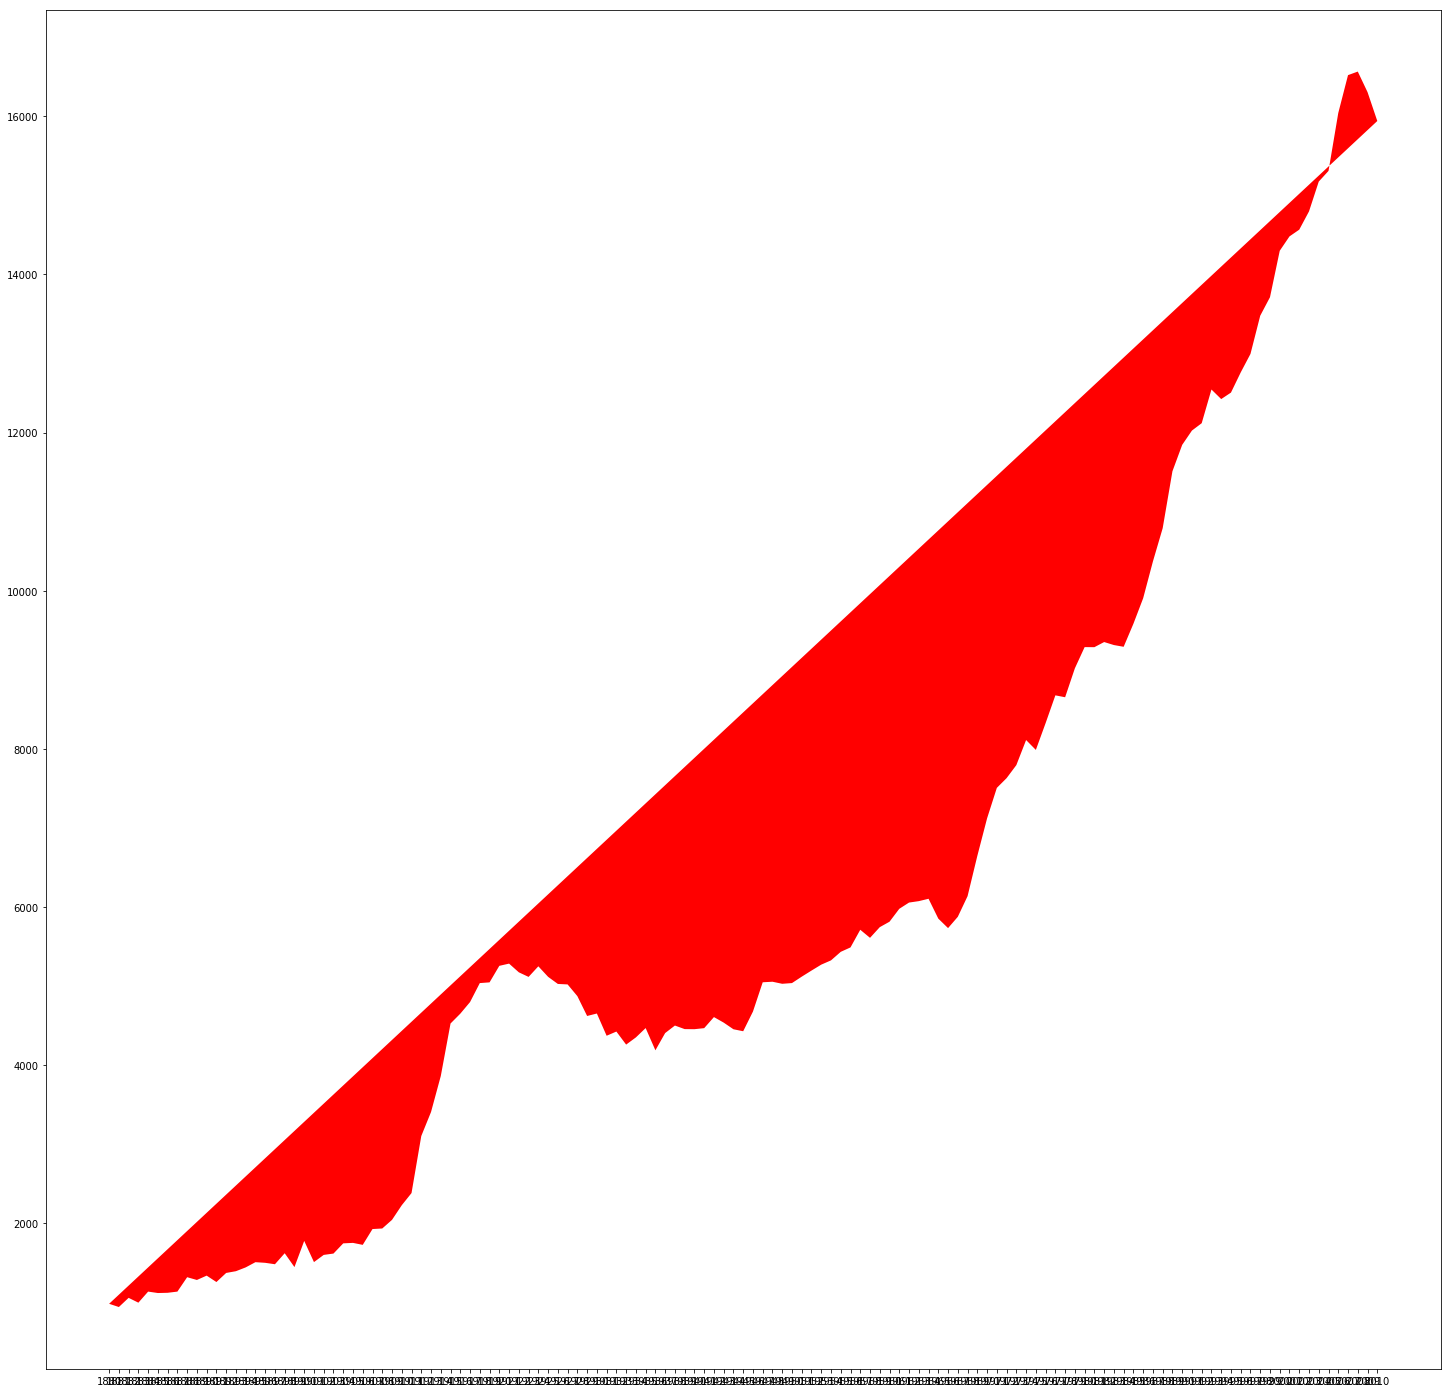

In [224]:
fg = plt.figure(figsize=(25,25))
fg.add_subplot(111)
plt.fill(x,y,'r')

Делаем аналитику по первым и последним буквам

In [283]:
ma_fd = dfc[dfc['Year'] == i]
ma_humps=list(ma_fd['Name'])
letter = []
for k in ma_humps:
    cv = k[0]
    letter.append(cv)
c = Counter(letter)
c = dict(c)
c = pd.DataFrame([c],index = [i])
c.reset_index(inplace=True)
c

,index,A,B,C,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,2000,3314,1099,1837,2236,996,344,612,598,476,...,148,1315,2240,2024,66,269,198,66,426,467


In [225]:
dfc

,Name,Sex,Amount,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [232]:
year_4 = ['1880','1890','1895','2000']

In [236]:
ma_fd = dfc[dfc['Year'] == '1880']

In [231]:
ma_fd

,Name,Sex,Amount,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [301]:
dsa = {}
for i in year_4:
    ma_fd = dfc[dfc['Year'] == i]
    ma_humps=list(ma_fd['Name'])
    letter = []
    for k in ma_humps:
        cv = k[0]
        letter.append(cv)
    c = Counter(letter)
    c = dict(c)
    c = pd.DataFrame([c],index = [i])
    dsa.update({i:c})
    ##c = c.transpose()
    ##print(c)
    ##c.reset_index(inplace=True)
    ##pd.merge(dsa,c,how='outer',on ='index')

In [302]:
count_data = dsa['1880'].append(dsa['1890']).append(dsa['1895']).append(dsa['2000']).T

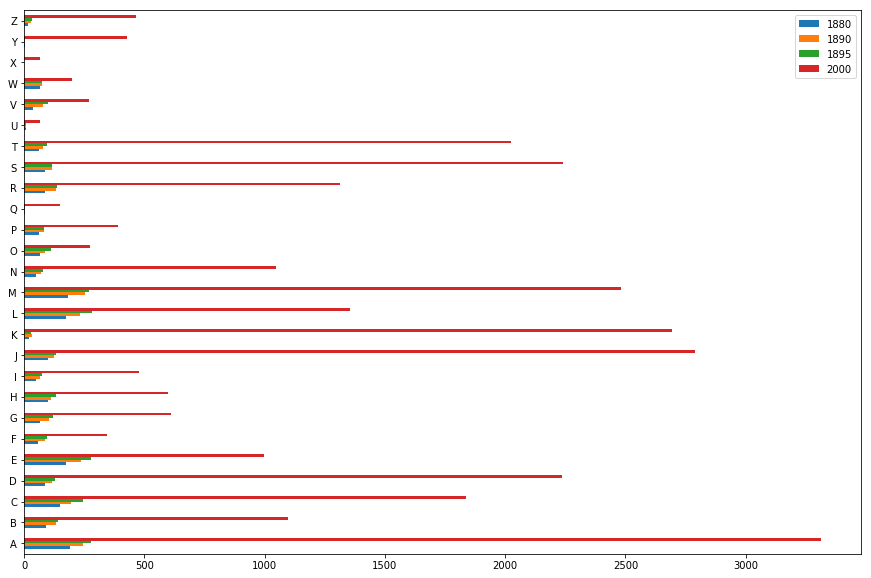

In [308]:
count_data.plot(kind='barh',figsize=(15,10))